# Description of the project
You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

### Open the data file and examine the general information ###

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Importing a dataset

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


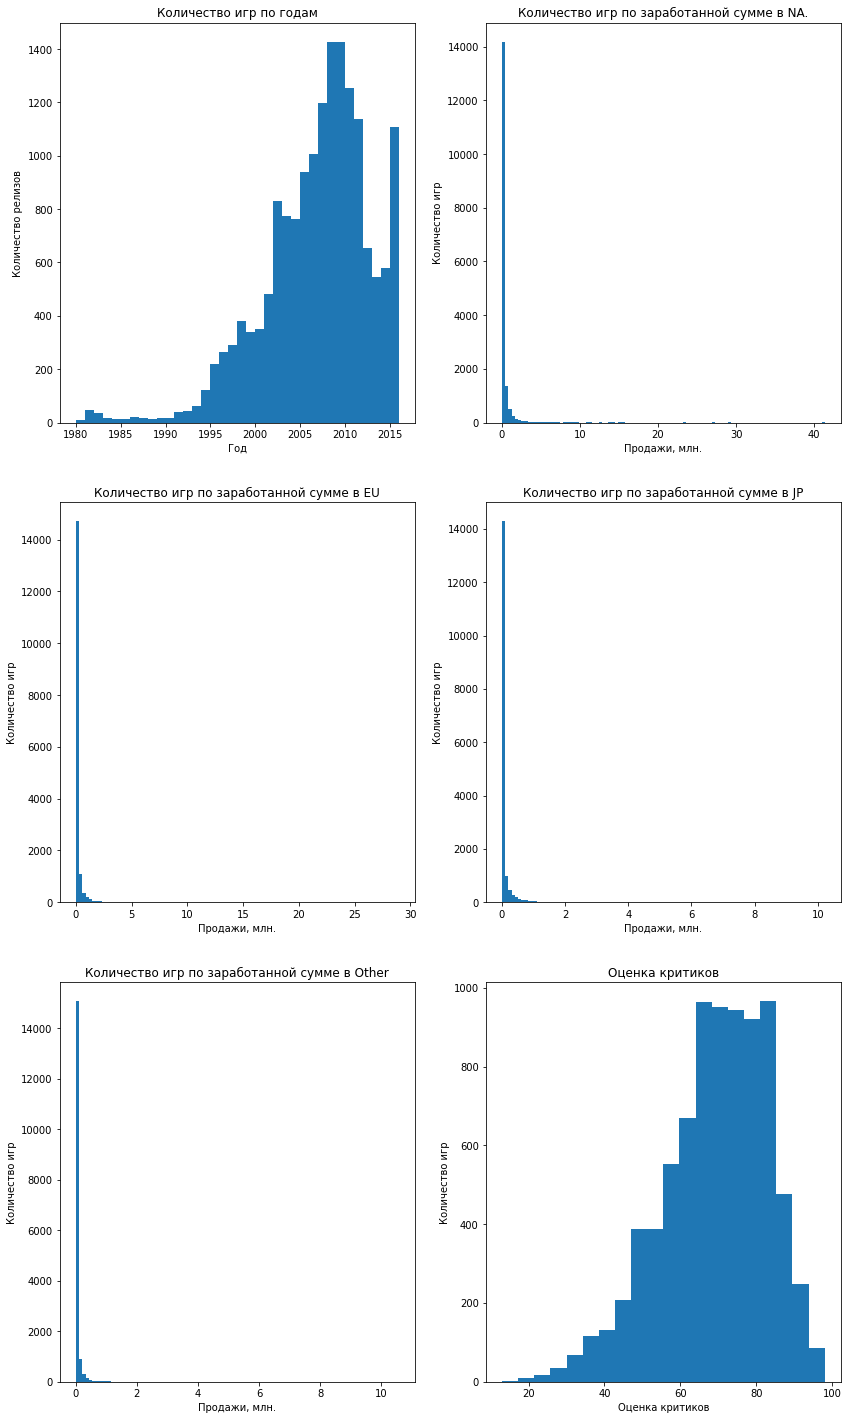

In [5]:
fig, axes = plt.subplots(3, 2)

axes[0, 0].hist(df.Year_of_Release, bins = 36) 
axes[0, 0].set_title('Количество игр по годам')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Количество релизов')

axes[0, 1].hist(df.NA_sales, bins = 100) 
axes[0, 1].set_title('Количество игр по заработанной сумме в NA.')
axes[0, 1].set_xlabel('Продажи, млн.')
axes[0, 1].set_ylabel('Количество игр')

axes[1, 0].hist(df.EU_sales, bins = 100)
axes[1, 0].set_title('Количество игр по заработанной сумме в EU')
axes[1, 0].set_xlabel('Продажи, млн.')
axes[1, 0].set_ylabel('Количество игр')

axes[1, 1].hist(df.JP_sales, bins = 100)
axes[1, 1].set_title('Количество игр по заработанной сумме в JP')
axes[1, 1].set_xlabel('Продажи, млн.')
axes[1, 1].set_ylabel('Количество игр')

axes[2, 0].hist(df.Other_sales, bins = 100)
axes[2, 0].set_title('Количество игр по заработанной сумме в Other')
axes[2, 0].set_xlabel('Продажи, млн.')
axes[2, 0].set_ylabel('Количество игр')

axes[2, 1].hist(df.Critic_Score, bins = 20)
axes[2, 1].set_title('Оценка критиков')
axes[2, 1].set_xlabel('Оценка критиков')
axes[2, 1].set_ylabel('Количество игр')


fig.set_figwidth(14)
fig.set_figheight(25)

plt.show()

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Conclusions on section 1:
In this section, we got acquainted with the table and general information in it.
The table shows:
- Name of the game;
- the platform on which the game was released;
- the genre of the game.

Also, the number of games sold in millions for 4 regions:
- North America;
- Europe;
- Japan;
- other.
There are ratings of the game from:
- Users
- Critics
And the age rating.

User ratings are represented by the `object` type, you need to change it to a numeric one.\
Critics' ratings are clearly integer.\
There are a couple of gaps in the name of the games and the genre.\
Slightly more gaps in the field year of release of the game - 269.

There are a lot of gaps in the ratings of both users and critics, as well as in the age rating.
They were not filled in, because

**According to charts:**\
<i>Number of games by year:</i> Prior to 1995, very few games were released. Then follows an explosive growth until 2008, a fall and again growth.

<i>Number of games by amount earned:</i> in all regions there are a lot of games with a small number of sales, and relatively few with medium and large ones, the data is practically "lost" on the charts.

<i>Critic score:</i> looks adequate, I don't see any anomalies in the data, except for a large number of `NaN`.

### Data preparation ###

#### Convert column names to lowercase

In [8]:
df = df.rename(columns=str.lower)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Type conversion

In [10]:
print('Количество строк с user_score == "tbd":',
     df[df['user_score']=='tbd']['user_score'].count())


Количество строк с user_score == "tbd": 2424


In [11]:
try:
    df['year_of_release'] = df['year_of_release'].astype('Int16')
    print('year_of_release ok')
except:
    print('year_of_release type conversion fail')

try:
    df['critic_score'] = df['critic_score'].astype('Int8')
    print('critic_score ok')
except:
    print('critic_score type conversion fail')

try:
    df['user_score'] = pd.to_numeric(df['user_score'], errors='raise')
    print('user_score ok')
except:
    print('user_score type conversion fail')

year_of_release ok
critic_score ok
user_score ok


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int8   
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int16(1), Int8(1), float64(5), object(4)
memory usage: 1.2+ MB


**Why did they do this type conversion:**\
`year_of_release` - convert to Int16 to use less memory.\
`critic_score` - to Int8 because the values ​​are integer.\
`user_score` is in float because the values ​​are fractional.\
'tbd' - To Be Determined, dropped because it means the game doesn't have enough ratings yet.

#### Pass handling

In [13]:
def nan_value_barh(dataframe):
    (
        (dataframe.isna().sum())
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Оцениваем NaN' + "\n", fontsize = 22, color = 'SteelBlue')
    );    

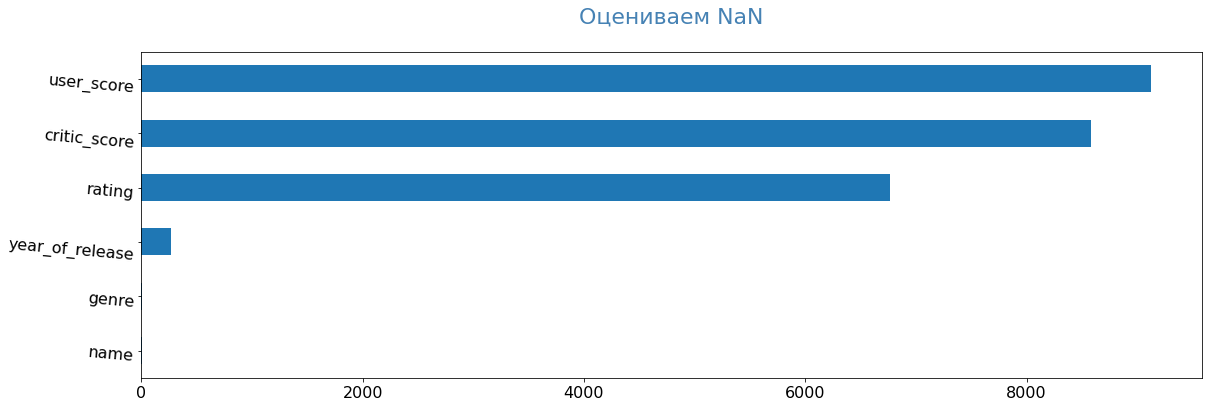

In [14]:
nan_value_barh(df)

In [15]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
display(df[df['name'].isna()].head())

display(df[df['genre'].isna()].head())

display(df[df['year_of_release'].isna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN


In [17]:
df.shape

(16715, 11)

In [18]:
df.dropna(subset=['name','genre','year_of_release'], inplace=True)
df.reset_index(drop=True,inplace=True)

In [19]:
df.shape

(16444, 11)

##### Check for obvious duplicates

In [20]:
print('Количетво явных дубликатов:', df.duplicated().sum())

Количетво явных дубликатов: 0


In [21]:
df[df[['name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


In [22]:
display(df[(df['name']=='Madden NFL 13') & (df['platform']=='PS3')])

display(df[(df['name']=='Need for Speed: Most Wanted') & (df['platform']=='PC')])

display(df[(df['name']=='Need for Speed: Most Wanted') & (df['platform']=='X360')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T


In [23]:
df.drop([15969],inplace = True)
df.reset_index(drop=True,inplace=True)

In [24]:
df.loc[11534,'name'] = df.loc[11534,'name'] + ' ' + str(df.loc[11534,'year_of_release'])
df.loc[11534,'name']

df.loc[1177,'name'] = df.loc[11534,'name'] + ' ' + str(df.loc[11534,'year_of_release'])
df.loc[1177,'name']

'Need for Speed: Most Wanted 2012 2012'

In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Check the number of rows where all scores are missing:

In [26]:
df[df['critic_score'].isna() & df['user_score'].isna() & df['rating'].isna()].isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6580
user_score         6580
rating             6580
dtype: int64

Where rating == NaN is replaced by the explicit value 'Not defined'

In [27]:
df['rating'] = df['rating'].fillna('Not defined')

In [28]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

##### Omissions
`name` - drop, there are two of them and we won't get anything from this data.\
`genre` - drop two of them and we won't get anything from this data.\
`year_of_release` is 269, it's easier to delete, we are unlikely to get something from this data. These may be announced but not yet released games.

There are lines in which there is at least one rating, but there are 6580 rows without ratings at all.

In [29]:
print('Уникальные названия игр:',df['name'].unique().shape[0])

Уникальные названия игр: 11428


#### Calculate the total sales in all regions and write them in a separate column.

In [30]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Not defined,31.38


#### Conclusions on section 2:
We delete `NaN` in `name`, `genre` - there are only 2 of them. And in `year_of_release` - there are 269 of them, but this is not so much from the entire dataset.
In `rating` - we replace NaN with `Not defined` to make it easier to process them.

We leave NaN in `critic_score` and `user_score`, we will still need this data.

Implicit duplicates were handled manually.

### Conduct exploratory data analysis

#### See how many games were released over the years. Is data for all periods important?

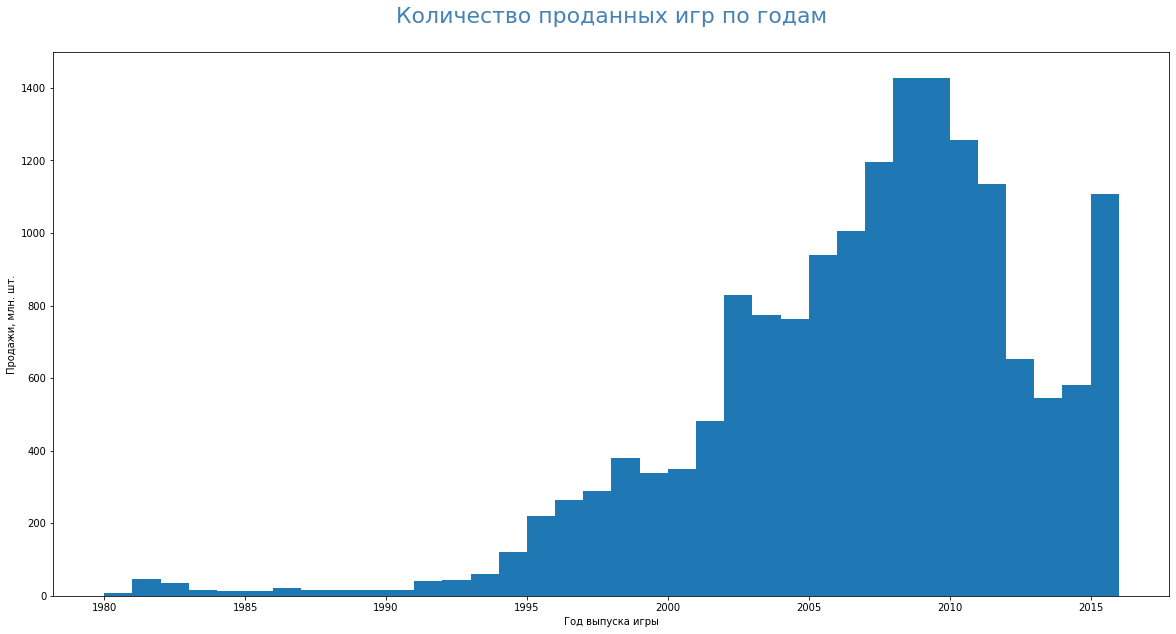

In [32]:
fig, ax = plt.subplots()

ax.hist(df.year_of_release,bins=(len(df['year_of_release'].unique())-1))
ax.set_title('Количество проданных игр по годам' + "\n", fontsize = 22, color = 'SteelBlue')
ax.set_xlabel('Год выпуска игры')
ax.set_ylabel('Продажи, млн. шт.')

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

In [33]:
df[df['year_of_release'] <= 2000].notna().sum()

name               2324
platform           2324
year_of_release    2324
genre              2324
na_sales           2324
eu_sales           2324
jp_sales           2324
other_sales        2324
critic_score        239
user_score          199
rating             2324
all_sales          2324
dtype: int64

After 2000

In [34]:
df[df['year_of_release'] >= 2000].notna().sum()

name               14469
platform           14469
year_of_release    14469
genre              14469
na_sales           14469
eu_sales           14469
jp_sales           14469
other_sales        14469
critic_score        7886
user_score          7370
rating             14469
all_sales          14469
dtype: int64

It can be seen that after 2000 about half of the data have an estimate, and before about 10%.

#### See how sales have changed by platform.
Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

In [35]:
print('Всего платформ:', df['platform'].unique().shape[0])

Всего платформ: 31


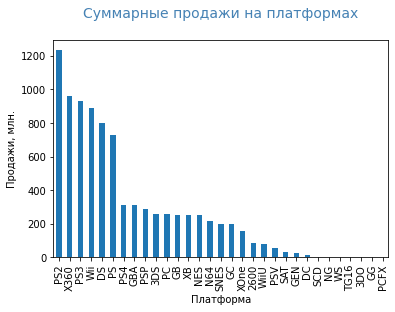

In [36]:
(
df.groupby(by=('platform'))['all_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Платформа')
    .set_title('Суммарные продажи на платформах' + "\n", fontsize = 14, color = 'SteelBlue')
);

Biggest total sales by a wide margin: PS2 X360 Wii PS3 DS PS\
Average total sales for GBA, PS4, PSP, XB, GB, NES, 3DS, PC, N64...

In [37]:
top_platforms = (
    df.pivot_table(index='platform', 
               values='all_sales', 
               aggfunc = 'sum')
    .sort_values(by='all_sales', ascending=False)
    .index[:6]
    .tolist()
)

print('Самые кассовые платформы:', top_platforms)

Самые кассовые платформы: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


Распределение по годам для самых больших платформ.


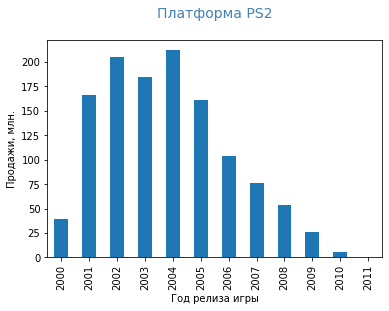

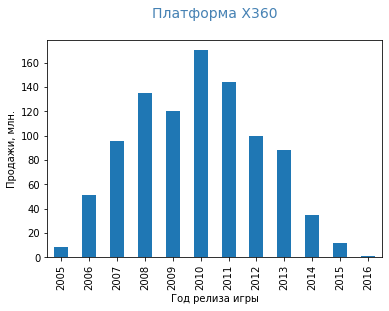

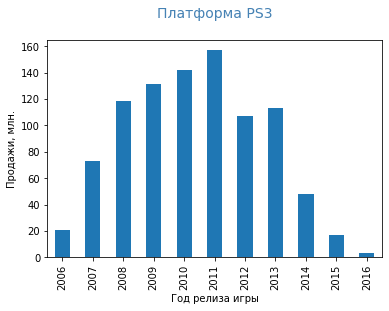

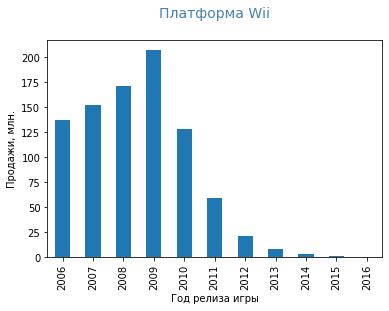

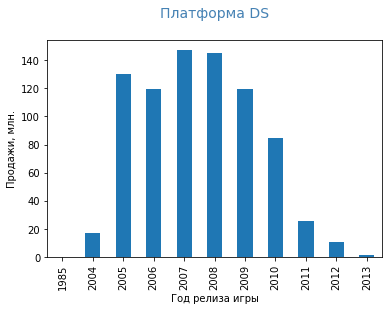

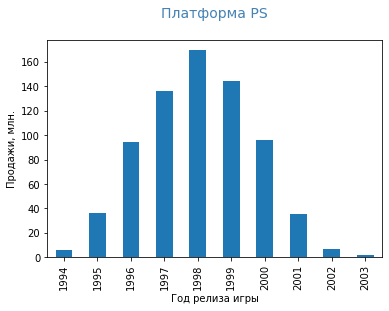

In [38]:
print('Распределение по годам для самых больших платформ.')
for x in top_platforms:
    (
    df[df['platform']==x].
        groupby(by='year_of_release')['all_sales']
        .sum()
        .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Год релиза игры')   
        .set_title('Платформа ' + x + '\n', fontsize = 14, color = 'SteelBlue')
    )
    plt.show()

In [39]:
platform_time = []
platform_name = [] 

for x in df['platform'].unique():
    platform_first_game = df[df['platform']==x]['year_of_release'].min()
    platform_last_game = df[df['platform']==x]['year_of_release'].max()
    
    platform_name.append(x)
    platform_time.append(platform_last_game-platform_first_game)

platform_lifetime = pd.Series(data=platform_time, index=platform_name).sort_values(ascending=False)
print('Среднее время жизни платформы(лет): %.1f' % platform_lifetime.mean())
print('Медианное время жизни платформы(лет):', platform_lifetime.median())
print()


top_platform_time = []
top_platform_name = []

for x in top_platforms:
    platform_first_game = df[df['platform']==x]['year_of_release'].min()
    platform_last_game = df[df['platform']==x]['year_of_release'].max()
    
    top_platform_name.append(x)
    top_platform_time.append(platform_last_game-platform_first_game)

top_platform_lifetime = pd.Series(data=top_platform_time, index=top_platform_name).sort_values(ascending=False)
print('Среднее время жизни топовых платформ(лет): %.1f' % top_platform_lifetime.mean())
print('Медианное время жизни топовых платформ(лет):', top_platform_lifetime.median())    

Среднее время жизни платформы(лет): 7.6
Медианное время жизни платформы(лет): 6.0

Среднее время жизни топовых платформ(лет): 13.2
Медианное время жизни топовых платформ(лет): 10.5


In [40]:
print('Количество платформ в датасете:', df['platform'].unique().shape[0])

Количество платформ в датасете: 31


#### Take the data for the corresponding actual period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017.
Do not include data from previous years in your work.


The actual period I plan to consider the period from 2014 inclusive.

df_a - current dataset with game release year > 2013

In [41]:
df_a = df[df['year_of_release'] > df['year_of_release'].max()-3].copy()
print('Количество платформ в датасете:', df_a['platform'].unique().shape[0])

Количество платформ в датасете: 10


#### Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

Hot Sale:
- max for the whole period.
- max sales for the last year

Grow:
- sales for the previous period < current

Fall down:
- sales for the previous period > current

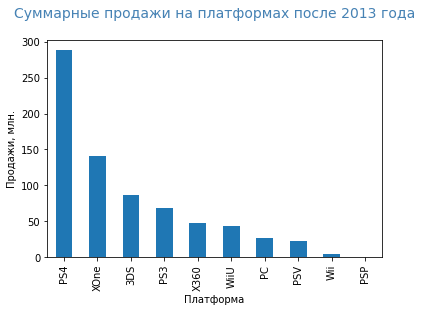

In [42]:
(
df_a.groupby(by=('platform'))['all_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Платформа')
    .set_title('Суммарные продажи на платформах после ' + str(df_a['year_of_release'].min()-1) + ' года' + "\n", fontsize = 14, color = 'SteelBlue')
)
plt.show()

In [43]:
def sales_growth_per_year(data, year):
    for x in data['platform'].unique():
        sales_current = df_a[(data['platform'] == x) & (data['year_of_release']==year)]['all_sales'].sum()
        sales_prew = df_a[(data['platform'] == x) & (data['year_of_release']==year-1)]['all_sales'].sum()
        delta = sales_current - sales_prew
        if delta > 0:
            print(x, delta)

##### Let's calculate whether sales grew and by how much in 2016 compared to 2015


In [44]:
sales_growth_per_year(df_a, 2016)

#### Calculate whether sales have grown and by how much in 2015 compared to 2014

In [45]:
sales_growth_per_year(df_a, 2015)

PS4 18.899999999999977
XOne 6.070000000000007


In 2016, sales did not grow anywhere, perhaps the data is not for the full year?\
Well, or releases did not have time to earn vedb just came out. We do not have information about payment dates.\
The game has been earning cumulatively every year since its release.\
And the older the game, the more it should earn. (Hypothesis)

In [46]:
for i in range(df_a['year_of_release'].max(), df_a['year_of_release'].max()-2, -1):
    print(f'Продажи выросли в {i} году у:')
    sales_growth_per_year(df_a, i)
    print()

Продажи выросли в 2016 году у:

Продажи выросли в 2015 году у:
PS4 18.899999999999977
XOne 6.070000000000007



**This can be done via pivot_table**

In [47]:
df_sales_growth = pd.pivot_table(df_a, values = ['all_sales'],
               index=['year_of_release','platform'],
               aggfunc='sum'
              ).sort_values(by='year_of_release',ascending=False)

df_sales_growth.head(10)

all_sales
year_of_release platform           
2016            XOne          26.15
                X360           1.52
                WiiU           4.60
                Wii            0.18
                PSV            4.25
                PS4           69.25
                PS3            3.60
                PC             5.25
                3DS           15.14
2015            PSV            6.25

In [48]:
for year in range (df_sales_growth.index.max()[0], df_sales_growth.index.min()[0], -1):
    for platform in df_sales_growth.loc[year].index:
        try:
            df_sales_growth.loc[(year,platform),'sales_delta'] = df_sales_growth.loc[(year,platform),'all_sales']-df_sales_growth.loc[(year-1,platform),'all_sales']
        except:
            print('exception:',year, platform)

In [49]:
df_sales_growth.head(20)

all_sales  sales_delta
year_of_release platform                        
2016            XOne          26.15       -33.99
                X360           1.52       -10.44
                WiiU           4.60       -11.75
                Wii            0.18        -0.96
                PSV            4.25        -2.00
                PS4           69.25       -49.65
                PS3            3.60       -13.22
                PC             5.25        -3.27
                3DS           15.14       -12.64
2015            PSV            6.25        -5.65
                XOne          60.14         6.07
                X360          11.96       -22.78
                WiiU          16.35        -5.68
                Wii            1.14        -2.61
                PSP            0.12        -0.12
                PS4          118.90        18.90
                PS3           16.82       -30.94
                PC             8.52        -4.76
                3DS           27.78       -15.98
2014            PC            13.28          NaN

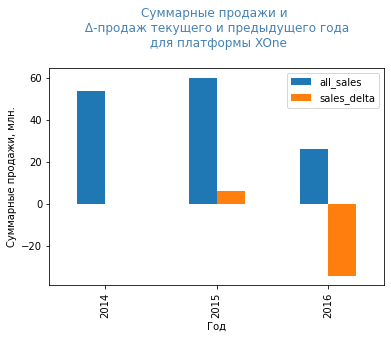

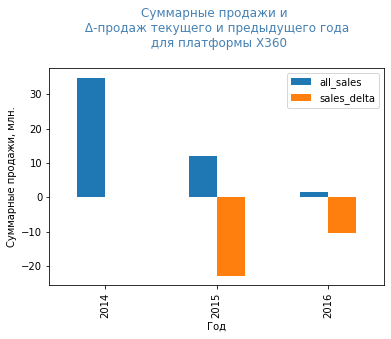

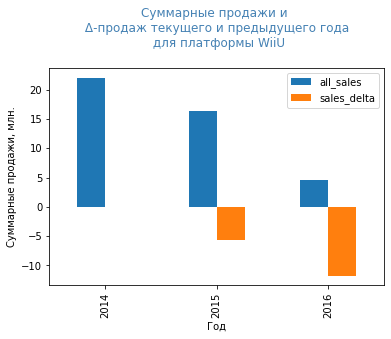

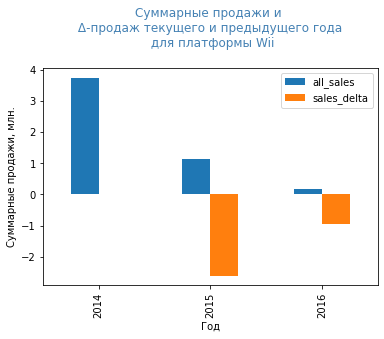

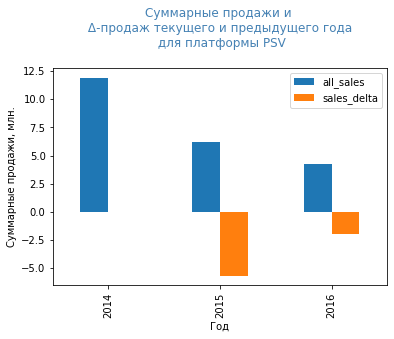

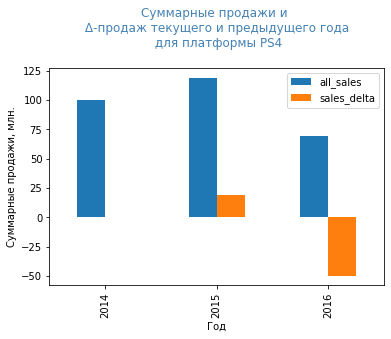

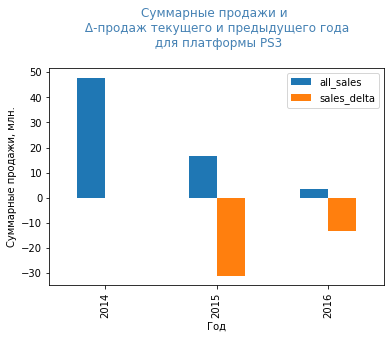

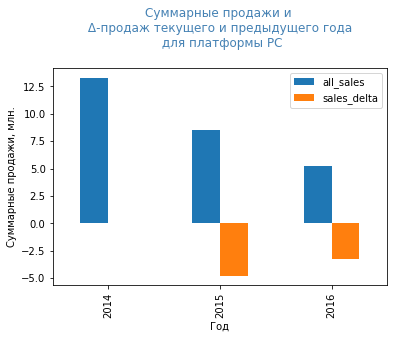

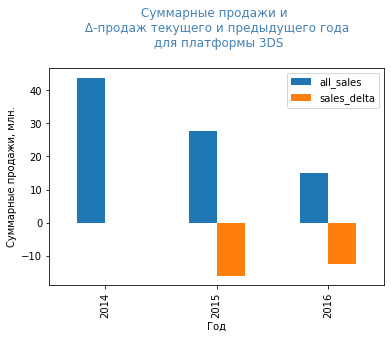

In [50]:
for platform in df_sales_growth.loc[df_sales_growth.index.max()[0]].index:
    (df_sales_growth
        .xs(platform, level="platform")
        .sort_values(by='year_of_release',ascending=True)
        .plot(kind='bar', xlabel='Год', ylabel='Суммарные продажи, млн.')
        .set_title('Суммарные продажи и \n Δ-продаж текущего и предыдущего года \n для платформы '+ str(platform) + "\n", fontsize = 12, color = 'SteelBlue')
    )
plt.plot();

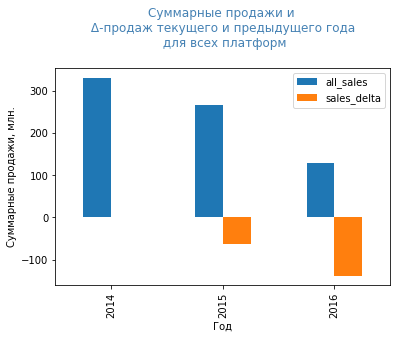

In [51]:
(df_sales_growth
        .groupby(by='year_of_release')
        .sum()
        .sort_values(by='year_of_release',ascending=True)
        .plot(kind='bar', xlabel='Год', ylabel='Суммарные продажи, млн.')
        .set_title('Суммарные продажи и \n Δ-продаж текущего и предыдущего года \n для всех платформ' + "\n", fontsize = 12, color = 'SteelBlue')
)
plt.plot();

#### Plot a box and mustache plot of global game sales by platform. Describe the result.


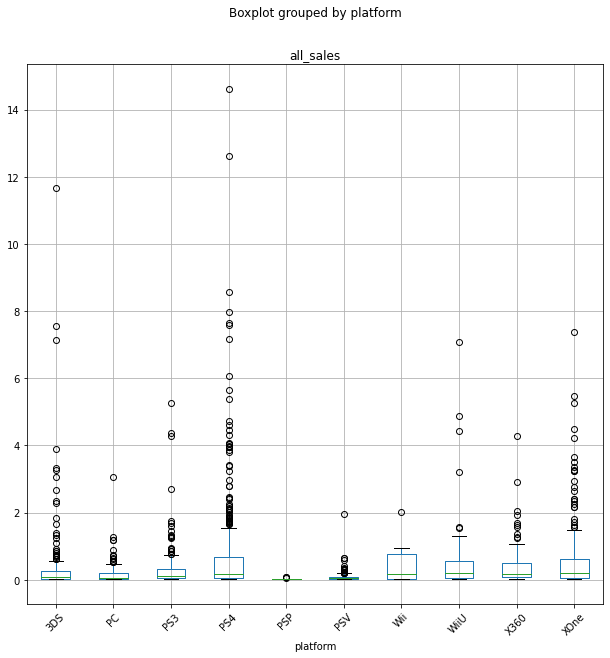

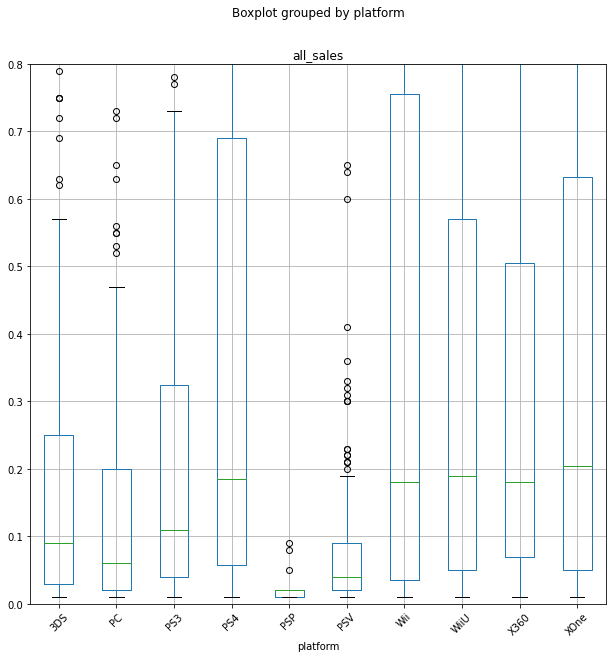

In [52]:
df_a.boxplot(column='all_sales', by='platform',rot=45,figsize=(10,10))
plt.show()

df_a.boxplot(column='all_sales', by='platform',rot=45,figsize=(10,10))
plt.ylim(0, 0.8)

plt.show()

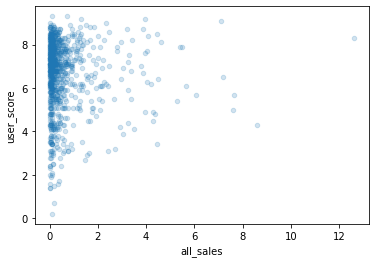

In [53]:
df_a.plot(
    x='all_sales', 
    y='user_score', 
    kind='scatter', 
    alpha=0.2);

We see huge "outliers" in almost all platforms. Perhaps the main income was brought by single projects. who "shot". Like the Wii, for example.

#### See how sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions.

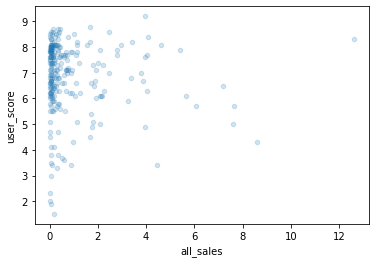

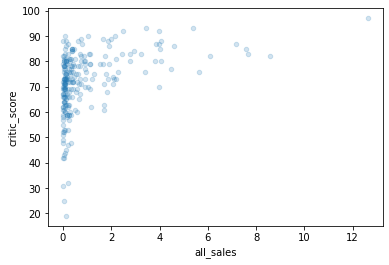

In [54]:
# PS4 user_score
df_a[df_a['platform']=='PS4'].plot(
    x='all_sales', 
    y='user_score', 
    kind='scatter', 
    alpha=0.2);

# PS4 critic_score
df_a[df_a['platform']=='PS4'].plot(
    x='all_sales', 
    y='critic_score', 
    kind='scatter', 
    alpha=0.2);

In [55]:
print('Корреляция между all_sales и critic_score для PS4: %.2f' %
    df_a[df_a['platform']=='PS4']['all_sales'].corr(df_a['critic_score'].astype(float))
)

print('Корреляция между all_sales и user_score для PS4: %.2f' %
    df_a[df_a['platform']=='PS4']['all_sales'].corr(df_a['user_score'].astype(float))
)

Корреляция между all_sales и critic_score для PS4: 0.40
Корреляция между all_sales и user_score для PS4: -0.04


For the `PS4` platform, there is no correlation between `user_score` and `all_sales`.\
But there is a weak correlation between `critic_score` and `all_sales`.\
Perhaps the critics' ratings are released before the start of sales or at the very beginning, which may affect the success of the launch of the game.

#### Compare findings with game sales on other platforms.


Корреляция между all_sales и critic_score для XOne: 0.42
Корреляция между all_sales и user_score для XOne: -0.07


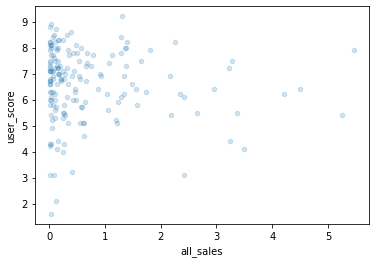

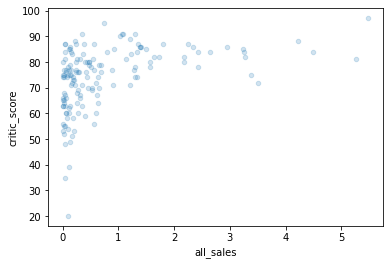

In [72]:
df_a[df_a['platform']=='XOne'].plot(
    x='all_sales', 
    y='user_score', 
    kind='scatter', 
    alpha=0.2);

df_a[df_a['platform']=='XOne'].plot(
    x='all_sales', 
    y='critic_score', 
    kind='scatter', 
    alpha=0.2);


print('Корреляция между all_sales и critic_score для XOne: %.2f' %
    df_a[df_a['platform']=='XOne']['all_sales'].corr(df_a['critic_score'].astype(float))
)

print('Корреляция между all_sales и user_score для XOne: %.2f' %
    df_a[df_a['platform']=='XOne']['all_sales'].corr(df_a['user_score'].astype(float))
)

Корреляция между all_sales и critic_score для X360: 0.53
Корреляция между all_sales и user_score для X360: -0.14


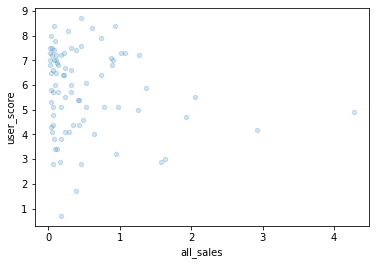

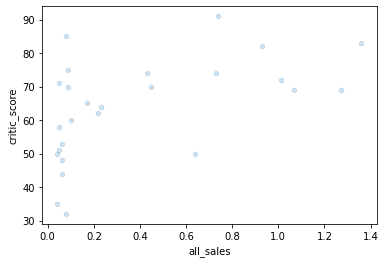

In [74]:
df_a[df_a['platform']=='X360'].plot(
    x='all_sales', 
    y='user_score', 
    kind='scatter', 
    alpha=0.2);

df_a[df_a['platform']=='X360'].plot(
    x='all_sales', 
    y='critic_score', 
    kind='scatter', 
    alpha=0.2);


print('Корреляция между all_sales и critic_score для X360: %.2f' %
    df_a[df_a['platform']=='X360']['all_sales'].corr(df_a['critic_score'].astype(float))
)

print('Корреляция между all_sales и user_score для X360: %.2f' %
    df_a[df_a['platform']=='X360']['all_sales'].corr(df_a['user_score'].astype(float))
)

For all platforms, there is also no correlation between `user_score` and `all_sales`, and the correlation between `critic_score` and `all_sales` is even smaller and weaker.

#### Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

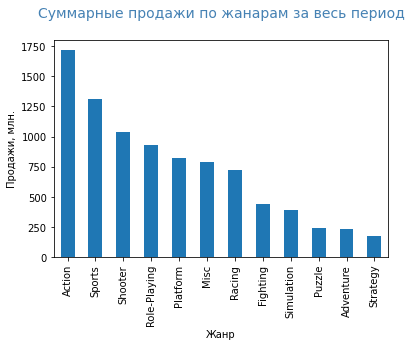

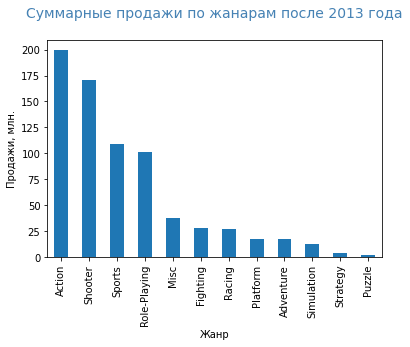

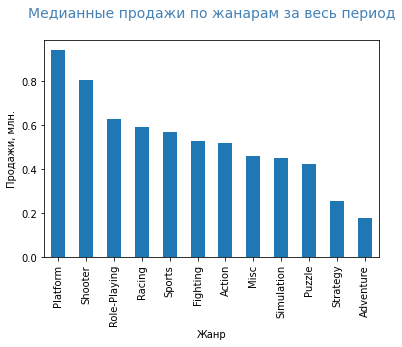

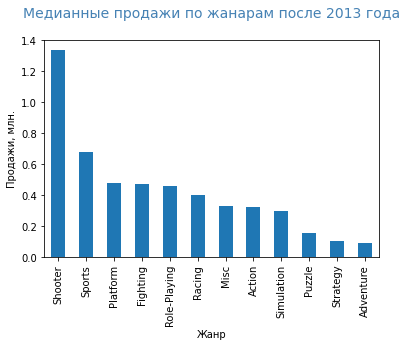

In [57]:
(
df.groupby(by=('genre'))['all_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Жанр')
    .set_title('Суммарные продажи по жанарам за весь период' + "\n", fontsize = 14, color = 'SteelBlue')
);
plt.show()

(
df_a.groupby(by=('genre'))['all_sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Жанр')
    .set_title('Суммарные продажи по жанарам после ' + str(df_a['year_of_release'].min()-1) + ' года' + "\n", fontsize = 14, color = 'SteelBlue')
);
plt.show()



(
df.groupby(by=('genre'))['all_sales']
    .mean()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Жанр')
    .set_title('Медианные продажи по жанарам за весь период' + "\n", fontsize = 14, color = 'SteelBlue')
);
plt.show()

(
df_a.groupby(by=('genre'))['all_sales']
    .mean()
    .sort_values(ascending=False)
    .plot(kind='bar', ylabel='Продажи, млн.', xlabel='Жанр')
    .set_title('Медианные продажи по жанарам после ' + str(df_a['year_of_release'].min()-1) + ' года' + "\n", fontsize = 14, color = 'SteelBlue')
);
plt.show()

We can say that there are definitely the most popular and the most unpopular genres.\
** If you count by the amount of sales, then: **\
`Action`, `Sports`, `Shooter` stand out the most as the most popular.\
You can also call `Adventure`, `Puzzle`, `Strategy` the most not successful.

**If counted by median burns:**\
After 2013:\
`Shooter`, `Sports`, `Platform` stand out the most as the most popular.\
You can also call `Puzzle`, `Adventure`, `Strategy` the most not successful.

#### Conclusions on Section 3

In our data, different "epochs" of the gaming industry stand out very strongly, it is clear that there is an era "before the Internet" when there were very few sales, then there is an increase until 2005 and an explosive growth in sales until 2008.

The failure after 2008 is easily explained by the global financial crisis, but this does not follow from the data and is just a hypothesis.

There are the highest grossing platforms in the data: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. But many of them have already completed their life cycle.

The platform life cycle is 6-10 years. Therefore, it is logical to take a rather short period, for the last 3 years, in order not to take into account completely irrelevant platforms.

For the current period, we can clearly identify the leading platforms: `PS4`, `XOne`, `DS`.
We can also see what sales growth has been observed in the entire market over the past 3 years and we see a clear drop in sales with acceleration.

Global game sales on the "box with a mustache" chart show that there are AAA titles that sell many times (even dozens of times) better than games on the platform average. Also, for different platforms, the median by the number of sales can vary several times.

In our study, there is no correlation between `user_score` and `all_sales`, and the correlation between `critic_score` and `all_sales` is weak.

It is possible to single out genres in which median sales are the best after 2013: `Shooter`, `Sports`, `Misc`

### Create a user profile for each region

#### Determine for the user of each region (NA, EU, JP): The most popular platforms (top 5).

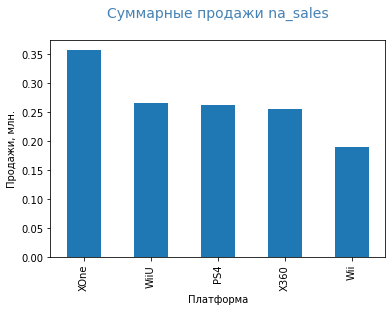

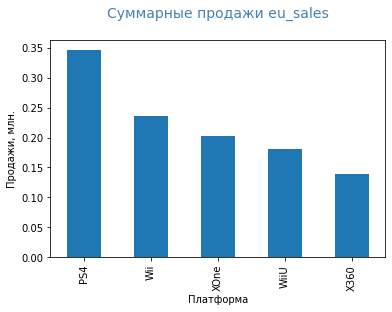

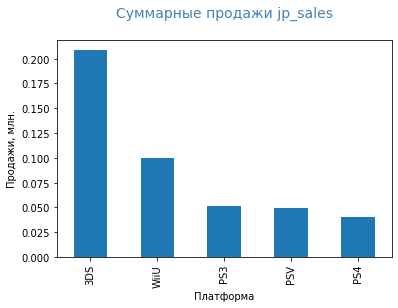

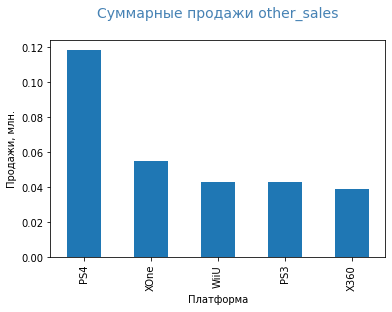

In [58]:
regions_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for x in regions_list:
    (
    df_a.groupby(by=('platform'))[x]
        .mean()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar',ylabel='Продажи, млн.',xlabel='Платформа')
        .set_title('Суммарные продажи '+ x + "\n", fontsize = 14, color = 'SteelBlue')
    );
    plt.show();

The `jp_sales` region stands out strongly, it is clear that local vendors are in the lead: Nintendo `3DS`, Sony `PS4` and `PSV`.\
Top 5 does not include Microsoft `X360`.

The `na_sales` and `eu_sales` regions are no longer so different, they clearly show a smaller presence of the Nintendo `3DS`. However, you can see that in the `eu_sales` region, the share of Sony `PS4` and `PS3` is larger, while Microsoft `XOne` is smaller.

The share `PC` in `eu_sales` is allocated, it does not exist in any of the other regions.

The `other_sales` region is closest to the `eu_sales` region in terms of sales distribution, with Sony `PS4` dominating.

#### Most popular genres (top 5). Explain the difference.


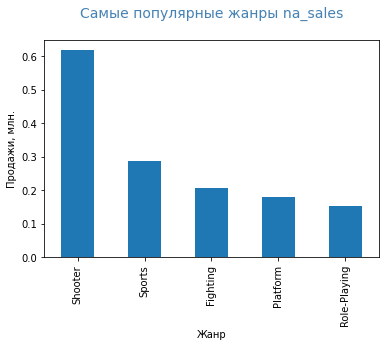

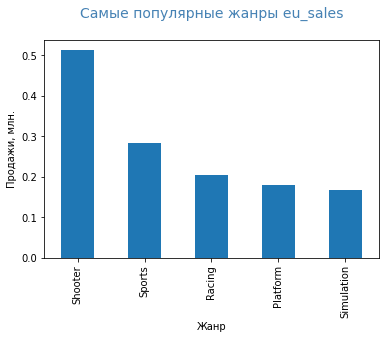

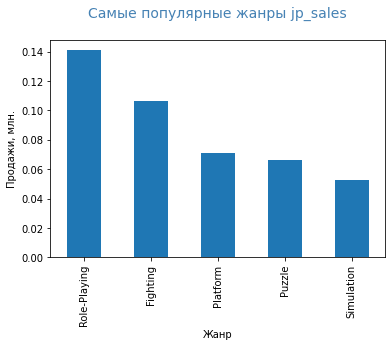

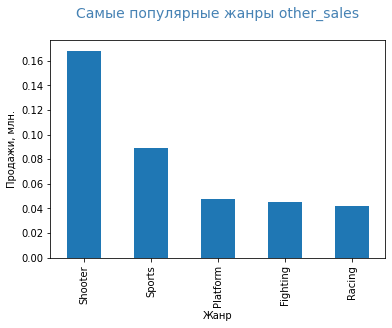

In [59]:
for x in regions_list:
    (
    df_a.groupby(by=('genre'))[x]
        .mean()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar',ylabel='Продажи, млн.',xlabel='Жанр')
        .set_title('Самые популярные жанры '+ x + "\n", fontsize = 14, color = 'SteelBlue')
    );
    plt.show();

The `jp_sales` region is highlighted again, it is clear that the `Role-Playing` genre is in the lead on it

Regions `na_sales` and `eu_sales` and `other_sales` only differ from 3rd place where they have different genres.

#### Does the ESRB rating affect sales in a particular region?

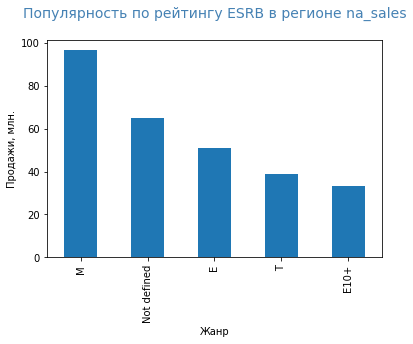

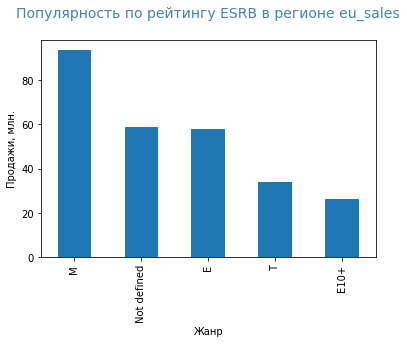

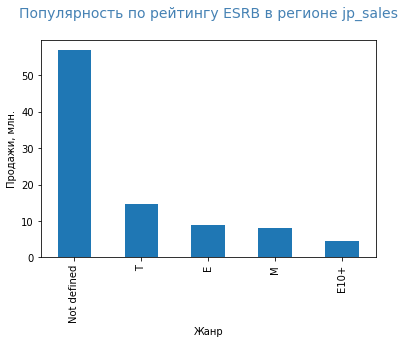

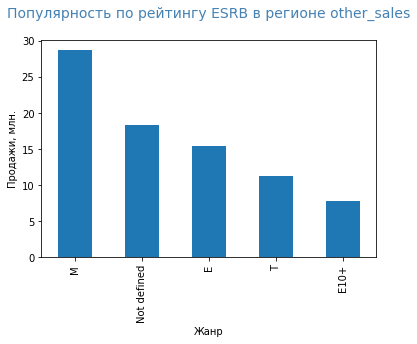

In [60]:
for x in regions_list:
    (
    df_a.groupby(by=('rating'))[x]
        .sum()
        .sort_values(ascending=False)
        .plot(kind='bar',ylabel='Продажи, млн.',xlabel='Жанр')
        .set_title('Популярность по рейтингу ESRB в регионе '+ x + "\n", fontsize = 14, color = 'SteelBlue')
    )
    plt.show();

Regions are almost the same.

The `jp_sales` region is different in that most of the games in it are not MSRB rated, probably because it is an American rating agency and they do not have a mandatory labeling requirement for games.

We can conclude that the rating affects sales in the `jp_sales` region differently than in the rest.

#### Conclusions on section 4:
The `jp_sales` region stands out from the others.

Top platforms by region:
- `NA` - `XOne`
- `ME` - `PS4`
- Answer - tomorrow

The most popular genres up to 3rd place almost do not differ by region, except for `jp_sales`, where `Role-Playing` is in the first place, and `Fighting` is in the second place.



### Test Hypotheses

- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.
- Set the threshold value alpha yourself.

Explain:
- How did you formulate the null and alternative hypotheses;
- What criterion was used to test the hypotheses and why.

#### The average user ratings of the Xbox One and PC platforms are the same

**Hypotheses:**\
H_0: The average user scores (user_score) of the Xbox One(XOne) and PC platforms are equal.\
H_a: The average user scores (user_score) of the Xbox One(XOne) and PC platforms are not equal.

To solve this problem, we need to pass values ​​without NaN to the ttest_ind method. Therefore, we remove them from `user_score`.

In [61]:
df_a.dropna(subset=['user_score'], inplace=True)
df_a.reset_index(drop=True,inplace=True)

Let's check the size of our samples

In [62]:
print('XOne count: ',df_a[df_a['platform']=='XOne']['user_score'].count())
print('PC count: ',df_a[df_a['platform']=='PC']['user_score'].count())

XOne count:  165
PC count:  122


In [63]:
alpha = .05

results = st.ttest_ind(
    df_a[df_a['platform']=='XOne']['user_score'],
    df_a[df_a['platform']=='PC']['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha : 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


**Conclusion:** We failed to reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are equal.

#### The average user ratings of the genres Action and Sports are different.

**Hypotheses:**\
H_0: Average user ratings (user_score) of genres (genre) Action and Sports are equal.\
H_a: Average user ratings (user_score) of genres (genre) Action and Sports are not equal.

Let's check the size of our samples

In [64]:
print('XOne count: ',df_a[df_a['genre']=='Action']['user_score'].count())
print('PC count: ',df_a[df_a['genre']=='Sports']['user_score'].count())

XOne count:  297
PC count:  127


In [65]:
alpha = .05

results = st.ttest_ind(
    df_a[df_a['genre']=='Action']['user_score'],
    df_a[df_a['genre']=='Sports']['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha : 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Conclusion:** We failed to reject the alternative hypothesis that the average user ratings of the Action and Sports genres are not equal.

The `ttest_ind` criterion was used to test hypotheses about the equality of two populations.

### Write a general conclusion

The success of the game is affected by the `platform` on which it is released and the `genre`.

The average lifetime of the most successful platforms differs from the average lifetime of all platforms.
The game has been earning cumulatively every year since its release. There is a hypothesis that the earnings of the game depends on its "age".

By examining the "box with a mustache" in point 3.5 across all platforms, it can be said that there are games that have earned significantly more than the rest. You can call them flagships and check the correlation between the presence of very successful games and the lifespan of the platform.

There is a weak correlation between sales and critical acclaim. Perhaps the assessment of critics before and at the time of the start of sales affects.

The popularity of `platforms` and `genres` depends on the region, but there are strong differences only in `Japan`. This market should be considered separately.

The `ESRB` rating does not affect sales in the regions, but for `Japan` its influence is different, since there are a lot of unrated games in the region.

After testing the hypotheses, we get the following result:
- Failed to reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are equal.
- Failed to reject the alternative hypothesis that the average user ratings of the Action and Sports genres are not equal.

However, the `Japan` market is very different to test the hypotheses:
1. Not including Japan market.
2. Separately for Japan market.